In this project, I will step into the shoes of an entry-level data analyst at a social media agency, helping to  create a comprehensive report that analyzes the performance of different categories of social media posts.

## **Project Objectives**

Increase client reach and engagement

Gain valuable insights that will help improve social media performance

Achieve their social media goals and provide data-driven recommendations

## **Project Scenario**

I am working for a social media marketing company that specializes in promoting brands and products on a popular social media platform. Our team is responsible for analyzing the performance of different types of posts based on categories, such as health, family, food, etc. to help clients optimize their social media strategy and increase their reach and engagement.  

dataset: https://www.kaggle.com/datasets/bwandowando/reddit-rcasualuk-subreddit-dataset

I will use r/casualUK subreddit threads dataset to clean, analyze and visualize the data. Later, our team will use my analysis to make data-driven recommendations to clients to improve their social media performance. This feature will help the marketing agency deliver posts on time, within budget, and gain fast results.

To do this, I will identify the categories for the post (fitness, tech, family, beauty, etc), process, analyze, and visualize the data. After performing the analysis, I will share my findings, and provide recommendations.

# STEP 1: Understand the Data:

In [33]:
# Install required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [34]:
# r/CasualUK threads Dataset
file_threads = pd.read_csv('/Users/jobaerhossain/Downloads/CasualUK Subreddit Data/casualuk_subreddit_threads.csv')

In [35]:
file_threads.head(3)

,thread_id,author,distinguished,is_original_content,is_self,link_flair_text,locked,num_comments,over_18,score,selftext,spoiler,stickied,title,upvote_ratio,external_url,created_utc,edited
0,7c4a15a1-e9e2-5911-a5fb-1a5ad816e4bb,18cf115b-52c3-5d9a-ab71-cc71332ce41e,NaN,False,True,NaN,False,10,False,1,Help settle this discussion in our office. Mys...,False,False,"Rooves or roofs, what age are you and which do...",0.57,NaN,2024-12-12 14:01:24,1970-01-01 00:00:00
1,45f4bfef-5b11-59cc-ab3a-e8d8e03462c8,f61034c3-4205-513b-84fb-ef17699cf85f,NaN,False,False,NaN,False,65,False,110,NaN,False,False,Don’t half have to buy people some random sh*t...,0.72,NaN,2024-12-12 10:49:30,1970-01-01 00:00:00
2,076277f4-a4a5-5f8e-aad2-e6d78c4423f6,b2a0b715-56ce-5528-a5df-338b58b8151f,NaN,False,True,NaN,False,65,False,1,Argos are selling a Bush DVD player for £22 wh...,False,False,"New DVD player, SCART only?!",0.52,NaN,2024-12-12 10:42:57,1970-01-01 00:00:00


I am going to perform EDA to understand more about the data.

In [36]:
# Shape of the data
print("Thread has: ", file_threads.shape, "rows and columns")

Thread has:  (1164, 18) rows and columns


In [37]:
# data types of columns
print("Thread: \n", file_threads.dtypes)

Thread: 
 thread_id               object
author                  object
distinguished           object
is_original_content       bool
is_self                   bool
link_flair_text         object
locked                    bool
num_comments             int64
over_18                   bool
score                    int64
selftext                object
spoiler                   bool
stickied                  bool
title                   object
upvote_ratio           float64
external_url            object
created_utc             object
edited                  object
dtype: object


# Step 2: Data Cleaning:

In [38]:
# we are only interested in original posts. Therefore, getting rid of the reposts:
file_threads["selftext"].duplicated().drop_duplicates(keep="first", inplace= True)

# identify rows where "selftext" is missing or empty
missing_or_empty = file_threads["selftext"].isna()

# filter the dataframe to remove these rows
file_threads = file_threads[~missing_or_empty]

# Step 3: Data Categorization:

In [39]:
file_threads.insert(column= "category", loc= 11, value= None )
# Define categories and their associated keywords
categories = {
    "fitness": ["fitness", "workout", "exercise", "gym", "health", "running", "yoga", "weightlifting", "bodybuilding", "cardio", "strength training", "endurance", "flexibility", "mobility", "crossfit", "aerobics", "zumba", "pilates", "barre", "spinning", "cycling", "swimming", "boxing", "kickboxing", "martial arts", "dance", "aerobics", "calisthenics", "HIIT", "Tabata", "circuit training", "bootcamp", "personal training", "group fitness", "fitness class", "fitness studio", "fitness center", "fitness club", "fitness gym", "fitness trainer", "fitness coach", "fitness instructor", "fitness expert", "fitness professional", "fitness enthusiast", "fitness beginner", "fitness intermediate", "fitness advanced", "fitness goals", "fitness progress", "fitness journey", "fitness transformation", "fitness motivation", "fitness inspiration", "fitness tips", "fitness advice", "fitness resources", "fitness books", "fitness blogs", "fitness podcasts", "fitness forums", "fitness groups", "fitness classes", "fitness workshops", "fitness coaching", "fitness therapy", "fitness counseling", "fitness support", "fitness community", "fitness network", "fitness association", "fitness organization", "fitness charity", "fitness foundation", "fitness initiative", "fitness program", "fitness campaign", "fitness event", "fitness conference", "fitness seminar", "fitness webinar"],
    "tech": ["technology", "tech", "software", "hardware", "gadgets", "iphone", "ai", "samsung", "device", "programming", "Machine Learning", "Artificial Intelligence", "Big Data", "Blockchain", "IoT", "Cybersecurity", "Data Science", "Network Security", "Database Management", "Web Development", "Software Development", "Cloud Computing", "API Integration", "Mobile App Development", "Game Development", "UI/UX Design", "Digital Marketing", "E-commerce", "Social Media Marketing", "Content Marketing", "SEO", "PPC", "Email Marketing", "Influencer Marketing", "Affiliate Marketing", "Online Advertising", "Video Marketing", "Analytics", "Marketing Automation", "Customer Relationship Management", "Sales Funnel", "Lead Generation", "Conversion Rate Optimization", "A/B Testing", "Multivariate Testing", "Landing Page Optimization", "Copywriting", "Content Strategy", "Brand Strategy", "Brand Identity", "Logo Design", "Graphic Design", "Video Production", "Photography", "Illustration", "Animation", "Motion Graphics", "Visual Effects", "3D Modeling", "Augmented Reality", "Virtual Reality", "Web Design", "Mobile Design", "Print Design", "Packaging Design", "Product Design", "Industrial Design", "Interior Design", "Fashion Design", "Textile Design", "Jewelry Design", "Furniture Design", "Lighting Design", "Architectural Design", "Landscape Design", "Urban Design", "Sustainable Design", "Design Thinking", "User-Centered Design", "Human-Centered Design", "Service Design", "Experience Design", "Interaction Design", "Information Architecture", "Usability Testing", "User Research", "User Persona", "User Journey", "Wireframe", "Prototyping", "Mockup", "User Interface", "User Experience"],
    "family": ["family", "parenting", "children", "home", "relationships", "marriage", "kids", "baby", "mom", "dad", "mother", "father", "sister", "brother", "grandparents", "aunt", "uncle", "cousin", "niece", "nephew", "in-laws", "step-parents", "single parent", "adoption", "foster care", "childcare", "nanny", "babysitter", "preschool", "elementary school", "middle school", "high school", "college", "university", "homework", "extracurricular activities", "sports", "music", "dance", "art", "crafts", "cooking", "baking", "gardening", "outdoor activities", "family vacation", "family traditions", "family values", "family dynamics", "family communication", "family support", "family conflict", "family counseling", "family therapy", "parenting styles", "parenting challenges", "parenting tips", "parenting advice", "parenting resources", "parenting books", "parenting blogs", "parenting podcasts", "parenting forums", "parenting groups", "parenting classes", "parenting workshops", "parenting coaching", "parenting therapy", "parenting counseling", "parenting support", "parenting community", "parenting network", "parenting association", "parenting organization", "parenting charity", "parenting foundation", "parenting initiative", "parenting program", "parenting campaign", "parenting event", "parenting conference", "parenting seminar", "parenting webinar"],
    "beauty": ["beauty", "makeup", "skincare", "cosmetics", "fashion", "hair", "nails", "skin", "body", "face", "eyes", "lips", "cheeks", "eyebrows", "eyelashes", "eyeliner", "mascara", "eyeshadow", "foundation", "concealer", "powder", "blush", "bronzer", "highlighter", "lipstick", "lip gloss", "lip liner", "lip balm", "lip scrub", "lip mask", "lip plumper", "lip stain", "lip tint", "lip oil", "lip treatment", "lip care", "lip protection", "lip enhancement", "lip restoration", "lip rejuvenation", "lip augmentation", "lip surgery", "lip filler", "lip injection", "lip implant", "lip lift", "lip reduction", "lip reshaping", "lip sculpting", "lip shaping", "lip contouring"],
}

def categorize_this(text):
    for label, contents in categories.items():
        for content in contents:
            if content.lower() in text.lower():
                return label
    return "other"

# Apply the categorization function to the 'selftext' column and then insert the respective values to category column
file_threads["category"] = file_threads["selftext"].apply(categorize_this)
# Display the first few entries to verify
file_threads.head(5)

,thread_id,author,distinguished,is_original_content,is_self,link_flair_text,locked,num_comments,over_18,score,selftext,category,spoiler,stickied,title,upvote_ratio,external_url,created_utc,edited
0,7c4a15a1-e9e2-5911-a5fb-1a5ad816e4bb,18cf115b-52c3-5d9a-ab71-cc71332ce41e,NaN,False,True,NaN,False,10,False,1,Help settle this discussion in our office. Mys...,other,False,False,"Rooves or roofs, what age are you and which do...",0.57,NaN,2024-12-12 14:01:24,1970-01-01 00:00:00
2,076277f4-a4a5-5f8e-aad2-e6d78c4423f6,b2a0b715-56ce-5528-a5df-338b58b8151f,NaN,False,True,NaN,False,65,False,1,Argos are selling a Bush DVD player for £22 wh...,tech,False,False,"New DVD player, SCART only?!",0.52,NaN,2024-12-12 10:42:57,1970-01-01 00:00:00
3,a00497e2-8ded-5ee5-bd8a-a1d9d6badcb6,a224ce1a-02fb-5501-b7ad-1ed5f19b131a,NaN,False,True,NaN,False,44,False,18,To get a card for a lady who told me her husba...,tech,False,False,Would it be taboo....?,0.63,NaN,2024-12-12 09:26:20,2024-12-12 09:52:51
4,9d87e787-e912-543e-aa2d-4aa95959c84a,7e280b9e-4189-51b6-85b9-52cf37b9a106,NaN,False,True,NaN,False,56,False,9,"I’m a reasonable two finger typist, not terrib...",tech,False,False,Has anyone learned to touch type later in life...,0.73,NaN,2024-12-12 08:58:46,1970-01-01 00:00:00
5,a94b3c06-392d-58c6-be5d-da54ca11b3d7,c608878e-a918-59f9-94b8-cfd5743d8f92,NaN,False,False,NaN,False,41,False,102,This little beauty popped out of a small hedge...,beauty,False,False,Thanks deer,0.91,NaN,2024-12-12 08:47:20,1970-01-01 00:00:00


# Step 4: Data Analysis:

In [40]:
# what kind of posts are more engaging based on number of comments and score?
file_threads.groupby(by="category")[["score", "num_comments"]].mean().sort_values(by= "num_comments", ascending= False)

,score,num_comments
category,,
fitness,1115.714286,162.607143
tech,535.184426,141.131148
beauty,118.133333,113.733333
other,601.780059,105.222874
family,242.148760,99.702479


In [41]:
# which categories have higher upvote ratios, indicating positive reception.
file_threads.groupby("category")["upvote_ratio"].mean().sort_values(ascending= False)

category
other      0.798123
tech       0.788607
fitness    0.782143
beauty     0.779333
family     0.752562
Name: upvote_ratio, dtype: float64

/var/folders/f0/850z22vd73190gbkx3wrzrxh0000gn/T/ipykernel_1574/2890969227.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  file_threads.groupby(by = "hour")["num_comments"].median().sort_values(ascending=False).plot(kind = "bar", title = "Median number of comments by time of the day")


<Axes: title={'center': 'Median number of comments by time of the day'}, xlabel='hour'>

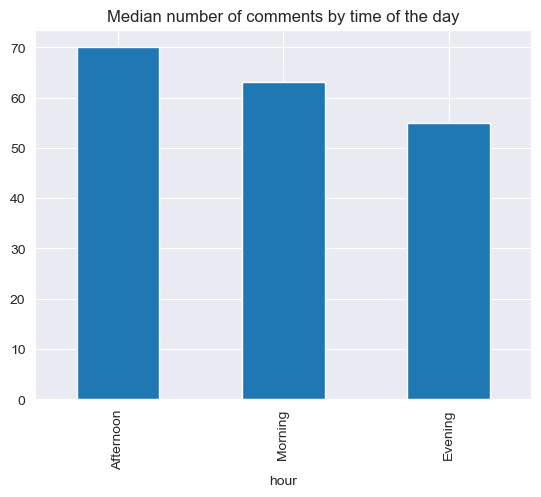

In [42]:
## Best time to post on reddit based on number of comments per post:
# created_utc column is in Unix timestamp format. I will convert it to datetime format for better understanding.
file_threads["created_utc"] = pd.to_datetime(file_threads["created_utc"])
# extract hour from created_utc
file_threads["hour"] = file_threads["created_utc"].dt.hour
# put the hours into 3 bins: Morning, Afternoon, Evening
file_threads["hour"] = pd.cut(file_threads["hour"], bins=[0, 11, 18, 23], labels=["Morning", "Afternoon", "Evening"])
file_threads.groupby(by = "hour")["num_comments"].median().sort_values(ascending=False).plot(kind = "bar", title = "Median number of comments by time of the day")

# Step 5: Data Visualization:

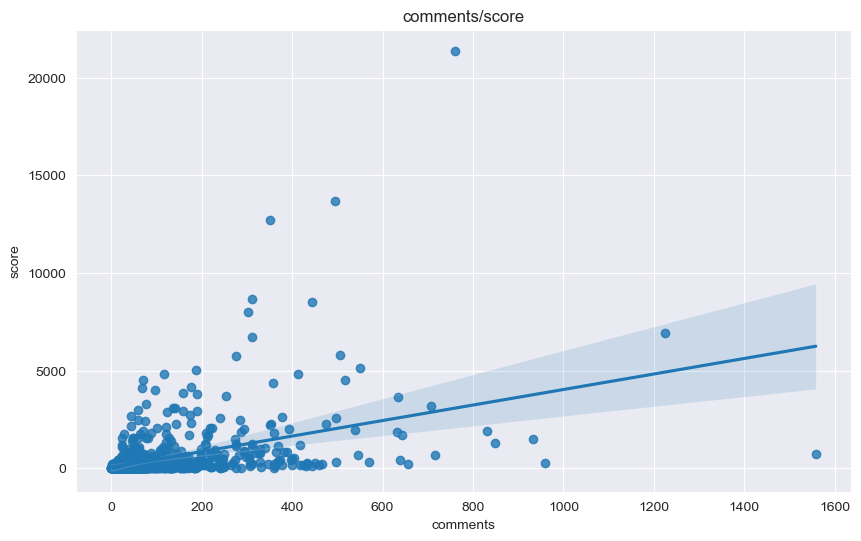

In [43]:
# Let's find out the relationship between num_comments and score
x = file_threads["num_comments"]
y = file_threads["score"]

plt.figure(figsize=(10, 6))
sns.regplot(data=file_threads, x= x, y=y)
plt.xlabel('comments')  
plt.ylabel('score') 
plt.title('comments/score')
plt.show()
# As num of comments increases the score slightly increases.

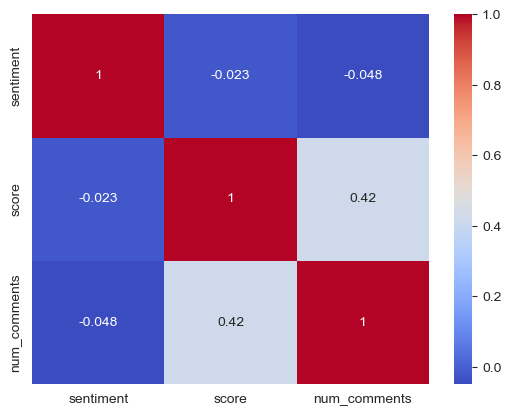

In [44]:
# Let's see how user sentiment relates to score and num_comments.

file_threads['sentiment'] = file_threads['selftext'].apply(lambda x: TextBlob(x).sentiment.polarity)
correlation = file_threads[['sentiment', 'score', 'num_comments']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

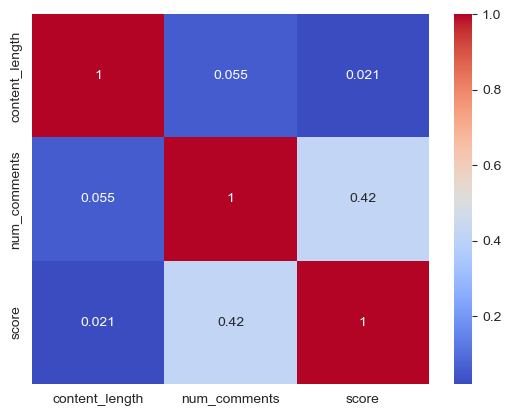

In [45]:
# Correlation Between Content Length and Engagement:

file_threads["content_length"] = file_threads["selftext"].apply(len)
correlation= file_threads[["content_length", "num_comments", "score"]].corr()
sns.heatmap(correlation, annot= True, cmap= "coolwarm")
plt.show()
